# Script XA DSA
This notebook imports necessary libraries and data from Excel files to work with ...

In [1]:
import dt_ids7_export_module as bh_utils
import mapping_module as bh_map
import plot_module as bh_plot

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'C:\\' # 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'


# Import the IDS7 data:
root_folder = path + "Users\\bjorn\\Downloads\\repdoser\\IDS7\\2023\\"
df_ids7 = bh_utils.import_excel_files_to_dataframe(root_folder)

# Import the IDS7 data:
root_folder = path + "Users\\bjorn\\Downloads\\repdoser\\DoseTrack - Serienivå\\2023\\"
df_dt = bh_utils.import_excel_files_to_dataframe(root_folder)

Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-01 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-02 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-03 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-04 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-05 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-06 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-07 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-08 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-09 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-10 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-11 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\IDS7\2023\2023-12 - OUS.xlsx...
Reading C:\Users\bjorn\Downloads\repdoser\DoseTrack - Serienivå\2023\2023-01 - OUS.xlsx...
Reading C:\Users\bjor

In [2]:
# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)

Dropping unnecessary column: Prioritet- og lesemerkeikon
Dropping unnecessary column: Lagt til i demonstrasjon-ikon
Dropping unnecessary column: Status
Number of rows with NaT in the column "Bestilt dato og tidspunkt": 425
Number of cancelled procedures: 2125
Number of non-human subjects: 20
Number of rows with invalid accession number: 10
676      NBOU000007962455
677      NBOU000007962455
2919     NORRAD0004436111
2920     NORRAD0004436111
2922     NORRAD0004443460
19989    NNRA000008253963
22565    NORRAD0004440016
35763    NNRA000008470721
35764    NNRA000008470721
38959    NNUL000009420412
Name: Henvisnings-ID, dtype: object
1277 entries was found matching the old siemens PACS format (7 characters long with only numbers.)
These will be converted to the new Sectra PACS format by adding "MUAH_" in front of the number.
Number of accession numbers in IDS7: 21498
Number of accession numbers in IDS7 not in DoseTrack: 6527
Without this column, we cannot keep track of which procedures are

In [3]:
import mapping_dict_elfys as elfys_dict
# Representative doser for radiologisk Rikshospital
data = data[data['Modality Room'].isin(['KRH_Elfys1', 'KRH_Elfys2', 'KRH_Elfys3', 'KRH_Elfys4', 'KRH_LAB39', 'KRH_Lab13'])]
import importlib
importlib.reload(elfys_dict)


# Get the mapping dictionary:
mapping_dict = elfys_dict.get_elfys_mapping_dict()
data = bh_map.map_procedures(data, mapping_dict, True)


Mapping procedures...

RGA Cor Ablasjon SVT (int.) -> RGA Cor Ablasjon SVT (int.) m og u 3D
RGA Cor Ablasjon SVT m 3D (int.) -> RGA Cor Ablasjon SVT (int.) m og u 3D
RGA Cor Ablasjon VT m 3D (int.) -> RGA Cor Ablasjon VT (int.) m 3D
RGA Cor Ablasjon Atrieflimmer (int.) -> RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D
WARNING! No procedures were targeted by this mapping!


RGA Cor Ablasjon Atrieflimmer med 3D (int.) -> RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D
RGA Cor Pulsed field ablasjon (elektroporasjon) atrieflimmer -> RGA Cor Pulsed field ablasjon (elektroporasjon) atrieflimmer
WARNING! No procedures were targeted by this mapping!


RGA Cor Cryo Ablasjon Atrieflimmer (int.) -> RGA Cor Cryo Ablasjon Atrieflimmer (int.)
RGA Cor Ablasjon Atrieflutter (int.) & ~Atrieflimmer -> RGA Cor Ablasjon Atrieflutter (int.) m og u 3D
RGA Cor Elfys SVT (int.) -> RGA Cor Elfys VT el. SVT (int.)
RGA Cor Elfys VT (int.) -> RGA Cor Elfys VT el. SVT (int.)
RGA Cor CRT-D (int.) -> RGA Cor CRT-D (i

c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\mapping_module.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Mapped Procedures'] = 'Unmapped'


Reporting doses for RGA Cor Ablasjon SVT (int.) m og u 3D:


Alle: n =  532, DAP: Median - 2.2, 95% CI: [1.93 - 2.48] IQR [1.1 - 4.7], Range (0.0 - 185.0).


KRH_Elfys1: n =  119, DAP: Median - 2.27 (Gy*cm2), 95% CI: [1.78 - 3.18] IQR [1.09 - 4.82], Range (0.16 - 184.97).
KRH_Elfys2: n =   47, DAP: Median - 2.18 (Gy*cm2), 95% CI: [1.78 - 3.08] IQR [1.3 - 4.36], Range (0.24 - 14.02).
KRH_Elfys3: n =  202, DAP: Median - 2.27 (Gy*cm2), 95% CI: [1.81 - 3.07] IQR [1.1 - 5.95], Range (0.0 - 166.44).
KRH_Elfys4: n =  164, DAP: Median - 2.2 (Gy*cm2), 95% CI: [1.64 - 2.6] IQR [1.09 - 3.82], Range (0.09 - 15.89).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


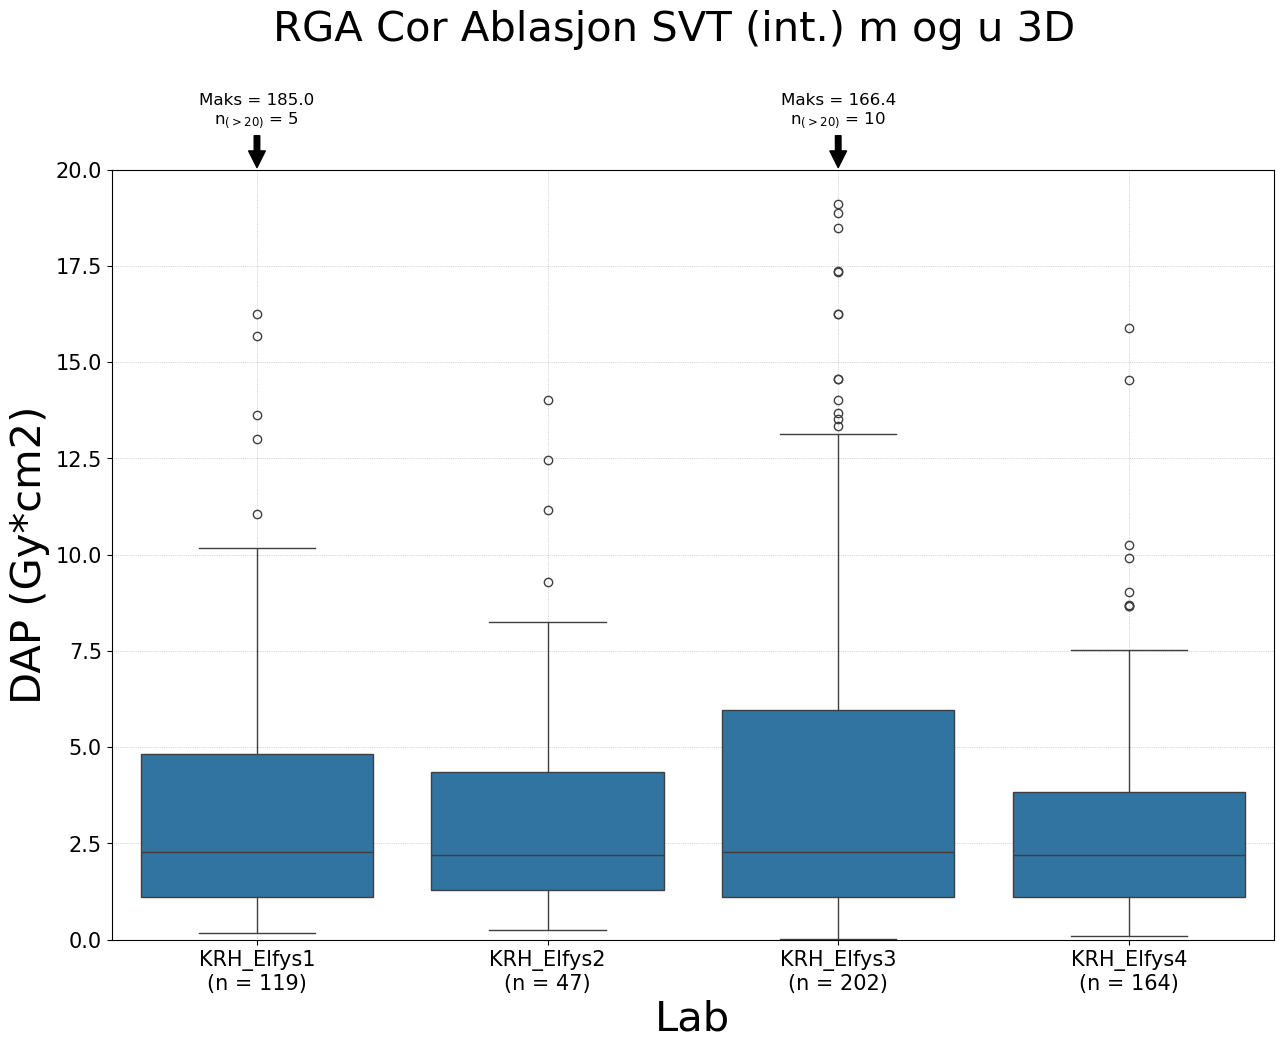

In [4]:
procedure = 'RGA Cor Ablasjon SVT (int.) m og u 3D'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)

Reporting doses for RGA Cor Ablasjon VT (int.) m 3D:


Alle: n =  190, DAP: Median - 3.3, 95% CI: [2.6 - 4.22] IQR [1.2 - 7.9], Range (0.2 - 181.8).


KRH_Elfys1: n =  135, DAP: Median - 3.49 (Gy*cm2), 95% CI: [2.55 - 4.54] IQR [1.13 - 8.05], Range (0.18 - 181.76).
KRH_Elfys2: n =    3, DAP: Median - 0.87 (Gy*cm2), 95% CI: [0.58 - 2.26] IQR [0.72 - 1.57], Range (0.58 - 2.26).
KRH_Elfys3: n =   52, DAP: Median - 3.28 (Gy*cm2), 95% CI: [2.29 - 5.17] IQR [1.65 - 8.34], Range (0.48 - 52.68).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


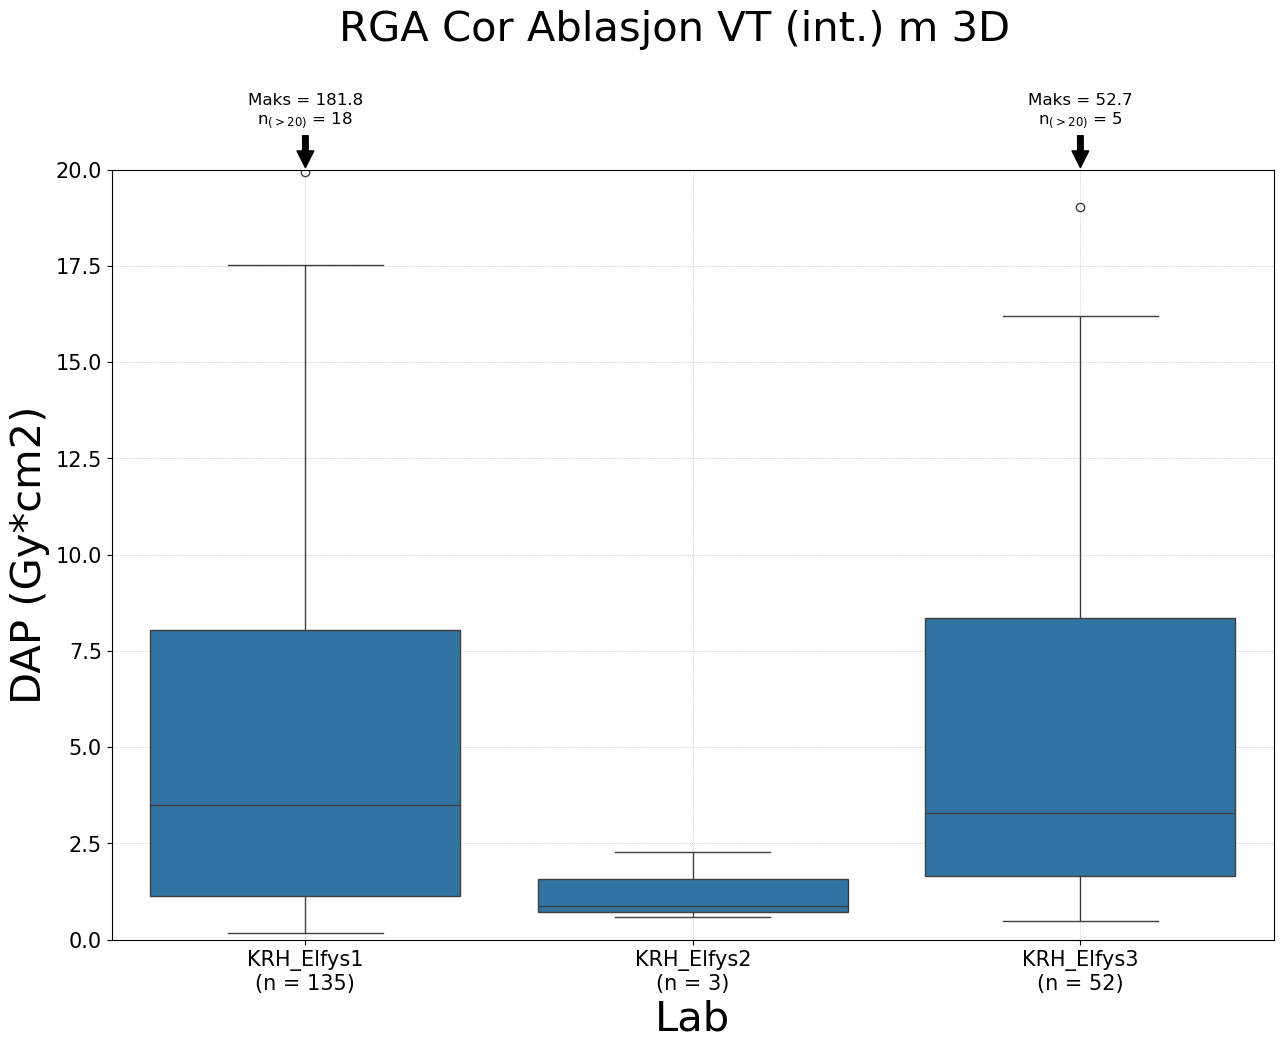

In [5]:
procedure = 'RGA Cor Ablasjon VT (int.) m 3D'
bh_plot.plot_representative_dose(data, procedure, 20, export)

Reporting doses for RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D:


Alle: n =  208, DAP: Median - 3.8, 95% CI: [3.13 - 4.78] IQR [2.2 - 7.9], Range (0.3 - 68.9).


KRH_Elfys1: n =   21, DAP: Median - 4.84 (Gy*cm2), 95% CI: [2.44 - 5.8] IQR [2.44 - 6.8], Range (0.52 - 23.51).
KRH_Elfys2: n =  183, DAP: Median - 3.71 (Gy*cm2), 95% CI: [3.07 - 4.69] IQR [2.1 - 7.84], Range (0.35 - 68.89).
KRH_Elfys3: n =    4, DAP: Median - 10.05 (Gy*cm2), 95% CI: [2.26 - 37.92] IQR [2.36 - 22.76], Range (2.26 - 37.92).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


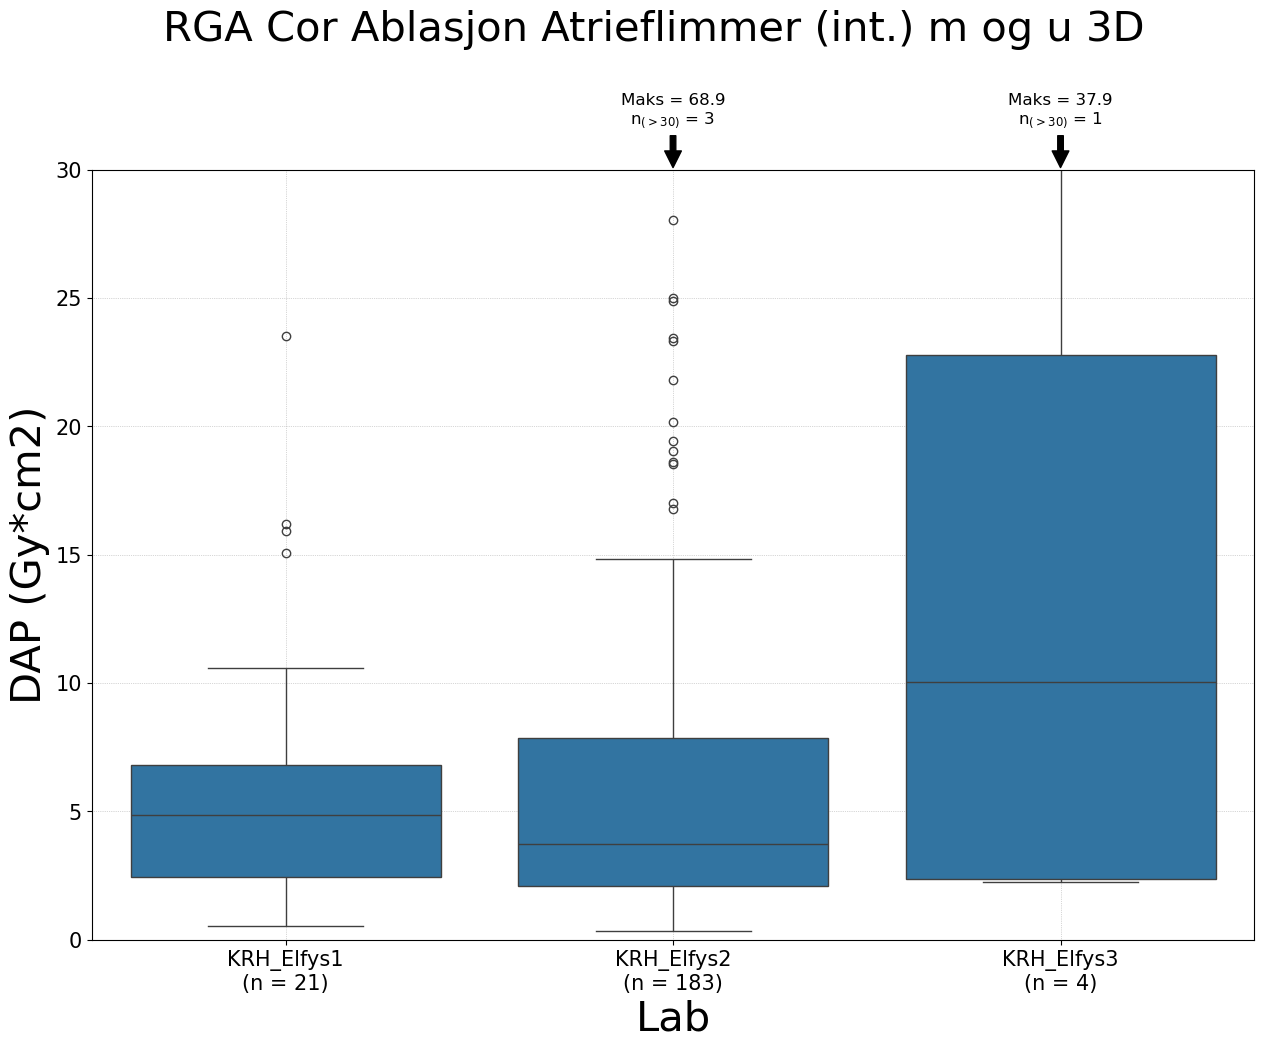

In [6]:
procedure = 'RGA Cor Ablasjon Atrieflimmer (int.) m og u 3D'
export = False
bh_plot.plot_representative_dose(data, procedure, 30, export)

Reporting doses for RGA Cor Pulsed field ablasjon (elektroporasjon) atrieflimmer:


Alle: n =    0, DAP: Median - nan, 95% CI: [nan - nan] IQR [nan - nan], Range (nan - nan).


--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


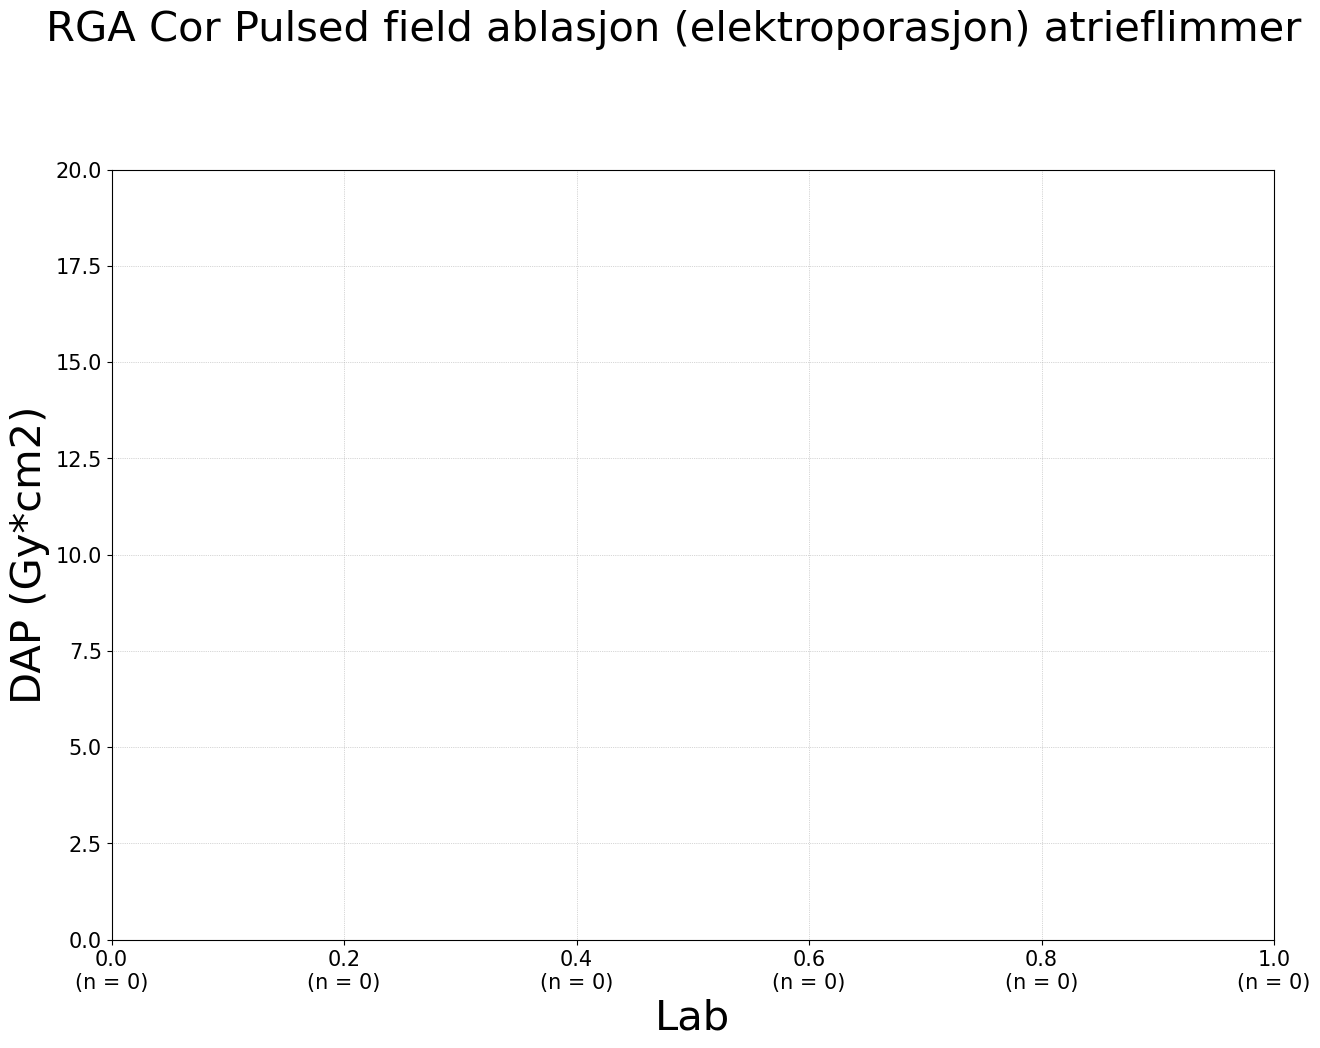

In [7]:
procedure = 'RGA Cor Pulsed field ablasjon (elektroporasjon) atrieflimmer'
bh_plot.plot_representative_dose(data, procedure, 20, export)

Reporting doses for RGA Cor Cryo Ablasjon Atrieflimmer (int.):


Alle: n =  147, DAP: Median - 9.6, 95% CI: [7.91 - 11.82] IQR [5.0 - 16.0], Range (1.4 - 98.2).


KRH_Elfys1: n =    1, DAP: Median - 98.23 (Gy*cm2), 95% CI: [98.23 - 98.23] IQR [98.23 - 98.23], Range (98.23 - 98.23).
KRH_Elfys2: n =  145, DAP: Median - 9.61 (Gy*cm2), 95% CI: [7.91 - 11.82] IQR [5.0 - 15.35], Range (1.4 - 51.33).
KRH_Elfys3: n =    1, DAP: Median - 2.85 (Gy*cm2), 95% CI: [2.85 - 2.85] IQR [2.85 - 2.85], Range (2.85 - 2.85).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


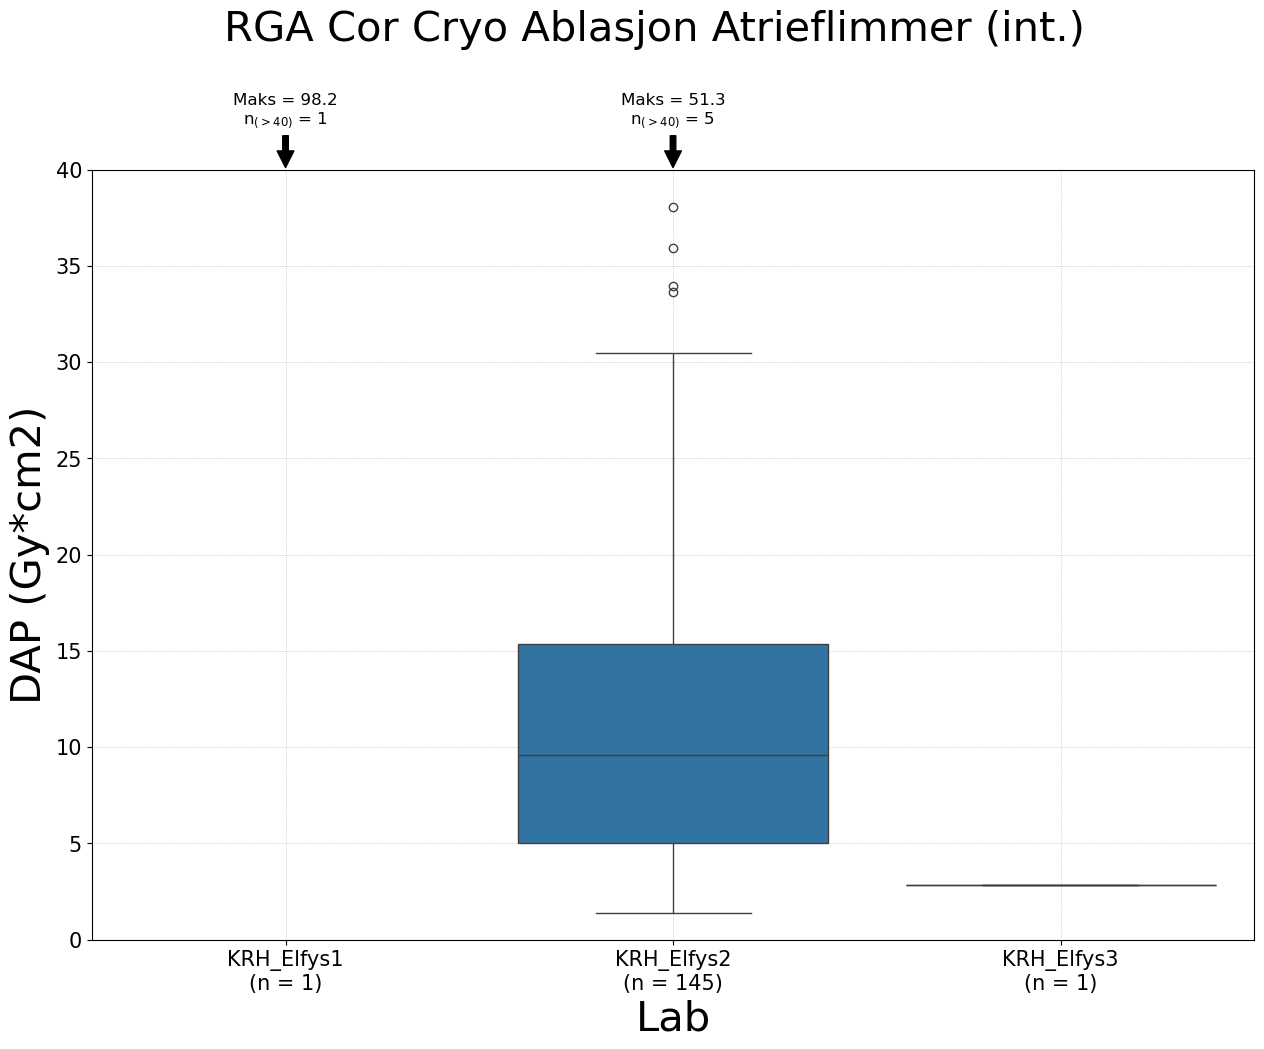

In [8]:
procedure = 'RGA Cor Cryo Ablasjon Atrieflimmer (int.)'
bh_plot.plot_representative_dose(data, procedure, 40, export)

Reporting doses for RGA Cor Ablasjon Atrieflutter (int.) m og u 3D:


Alle: n =  232, DAP: Median - 3.9, 95% CI: [3.56 - 4.3] IQR [2.5 - 6.4], Range (0.4 - 59.9).


KRH_Elfys1: n =   48, DAP: Median - 5.34 (Gy*cm2), 95% CI: [4.22 - 8.06] IQR [2.78 - 10.63], Range (0.36 - 23.8).
KRH_Elfys2: n =   28, DAP: Median - 5.09 (Gy*cm2), 95% CI: [4.25 - 7.62] IQR [4.06 - 12.47], Range (0.81 - 59.88).
KRH_Elfys3: n =   55, DAP: Median - 3.8 (Gy*cm2), 95% CI: [2.93 - 5.34] IQR [2.44 - 6.32], Range (0.71 - 53.23).
KRH_Elfys4: n =  101, DAP: Median - 3.49 (Gy*cm2), 95% CI: [2.83 - 3.76] IQR [2.41 - 4.76], Range (0.62 - 13.66).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


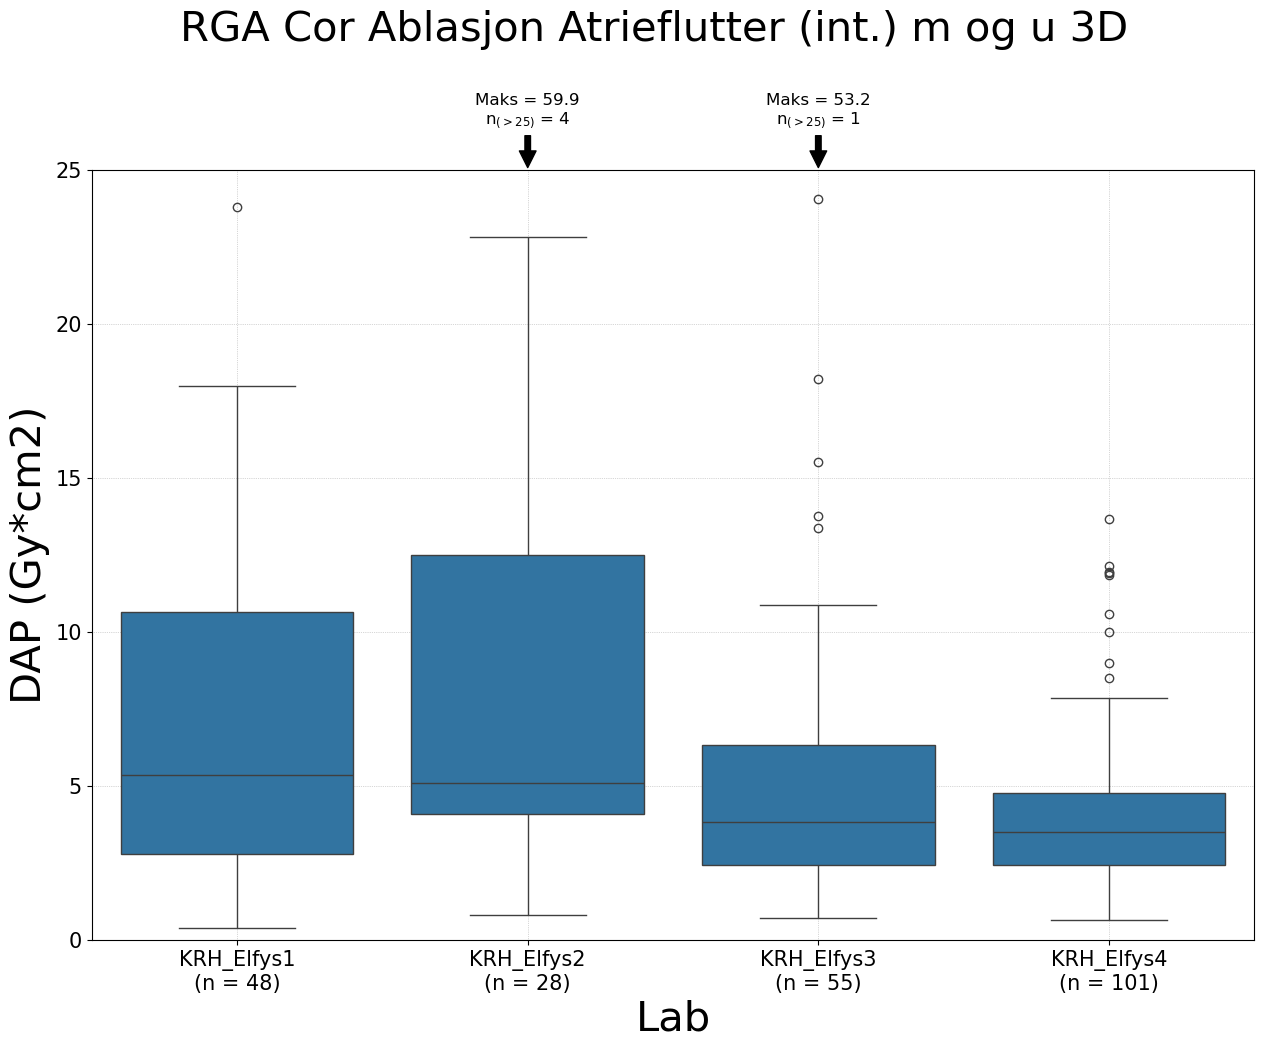

In [9]:
procedure = 'RGA Cor Ablasjon Atrieflutter (int.) m og u 3D'
bh_plot.plot_representative_dose(data, procedure, 25, export)

Reporting doses for RGA Cor Elfys VT el. SVT (int.):


Alle: n =  163, DAP: Median - 0.9, 95% CI: [0.74 - 1.0] IQR [0.4 - 1.8], Range (0.0 - 32.5).


KRH_Elfys1: n =   43, DAP: Median - 0.8 (Gy*cm2), 95% CI: [0.66 - 0.91] IQR [0.46 - 1.46], Range (0.0 - 4.75).
KRH_Elfys2: n =   13, DAP: Median - 0.5 (Gy*cm2), 95% CI: [0.31 - 0.84] IQR [0.31 - 0.84], Range (0.1 - 3.03).
KRH_Elfys3: n =   59, DAP: Median - 0.96 (Gy*cm2), 95% CI: [0.54 - 1.19] IQR [0.38 - 2.24], Range (0.03 - 32.46).
KRH_Elfys4: n =   48, DAP: Median - 1.06 (Gy*cm2), 95% CI: [0.77 - 1.65] IQR [0.47 - 3.8], Range (0.15 - 13.98).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


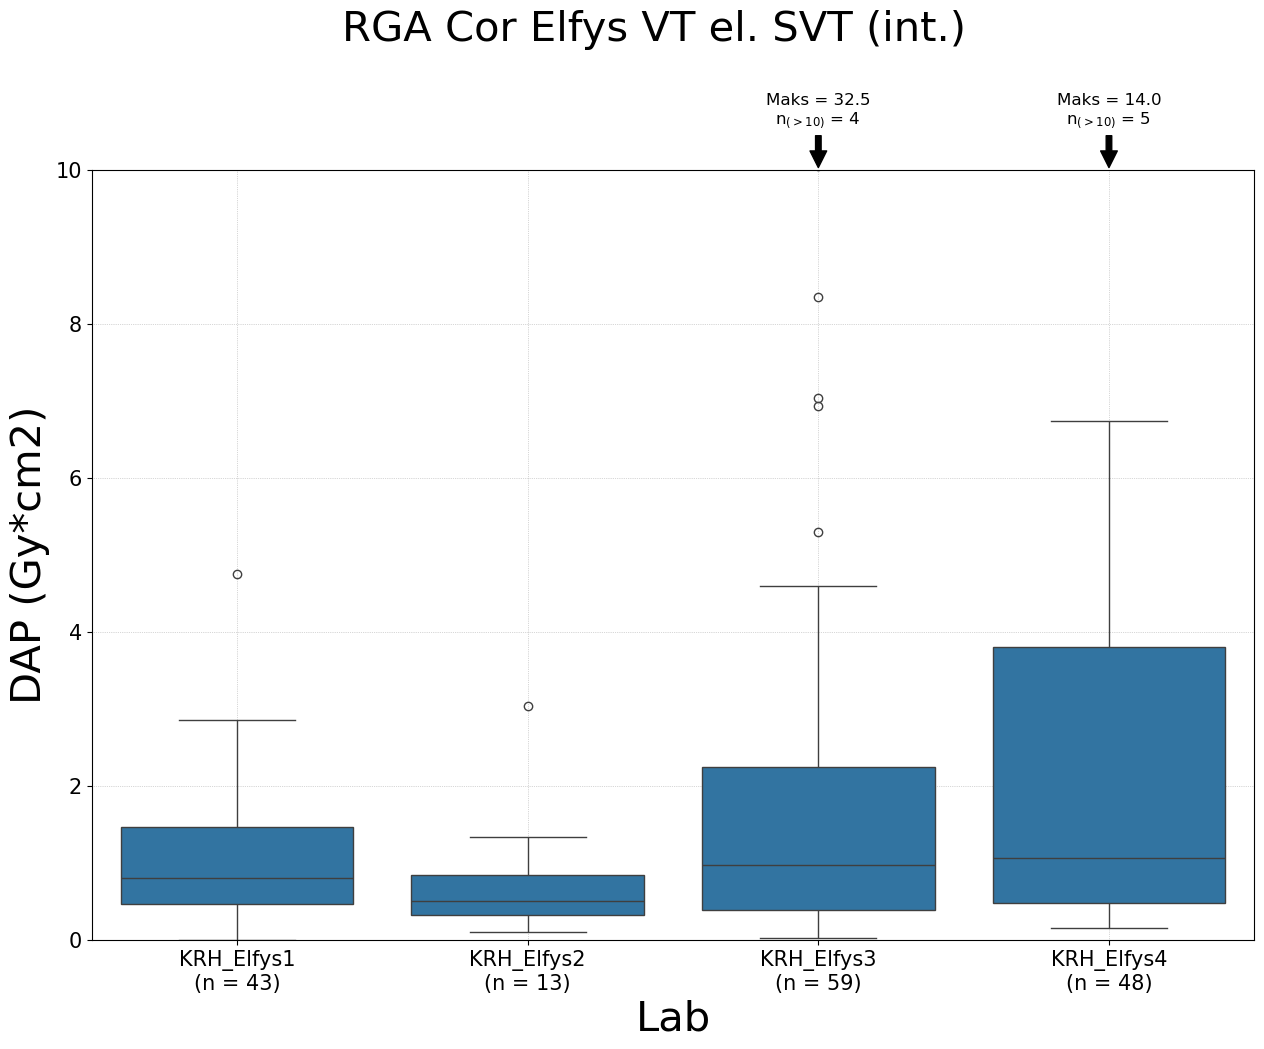

In [10]:
procedure = 'RGA Cor Elfys VT el. SVT (int.)'
bh_plot.plot_representative_dose(data, procedure, 10, export)

Reporting doses for RGA Cor CRT-D (int.) ink. CRT-P:


Alle: n =  118, DAP: Median - 7.7, 95% CI: [6.3 - 11.74] IQR [4.5 - 18.2], Range (0.3 - 295.3).


KRH_Elfys3: n =    2, DAP: Median - 3.65 (Gy*cm2), 95% CI: [1.16 - 6.14] IQR [2.41 - 4.9], Range (1.16 - 6.14).
KRH_Lab13: n =  116, DAP: Median - 7.9 (Gy*cm2), 95% CI: [6.44 - 12.28] IQR [4.47 - 18.41], Range (0.33 - 295.3).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


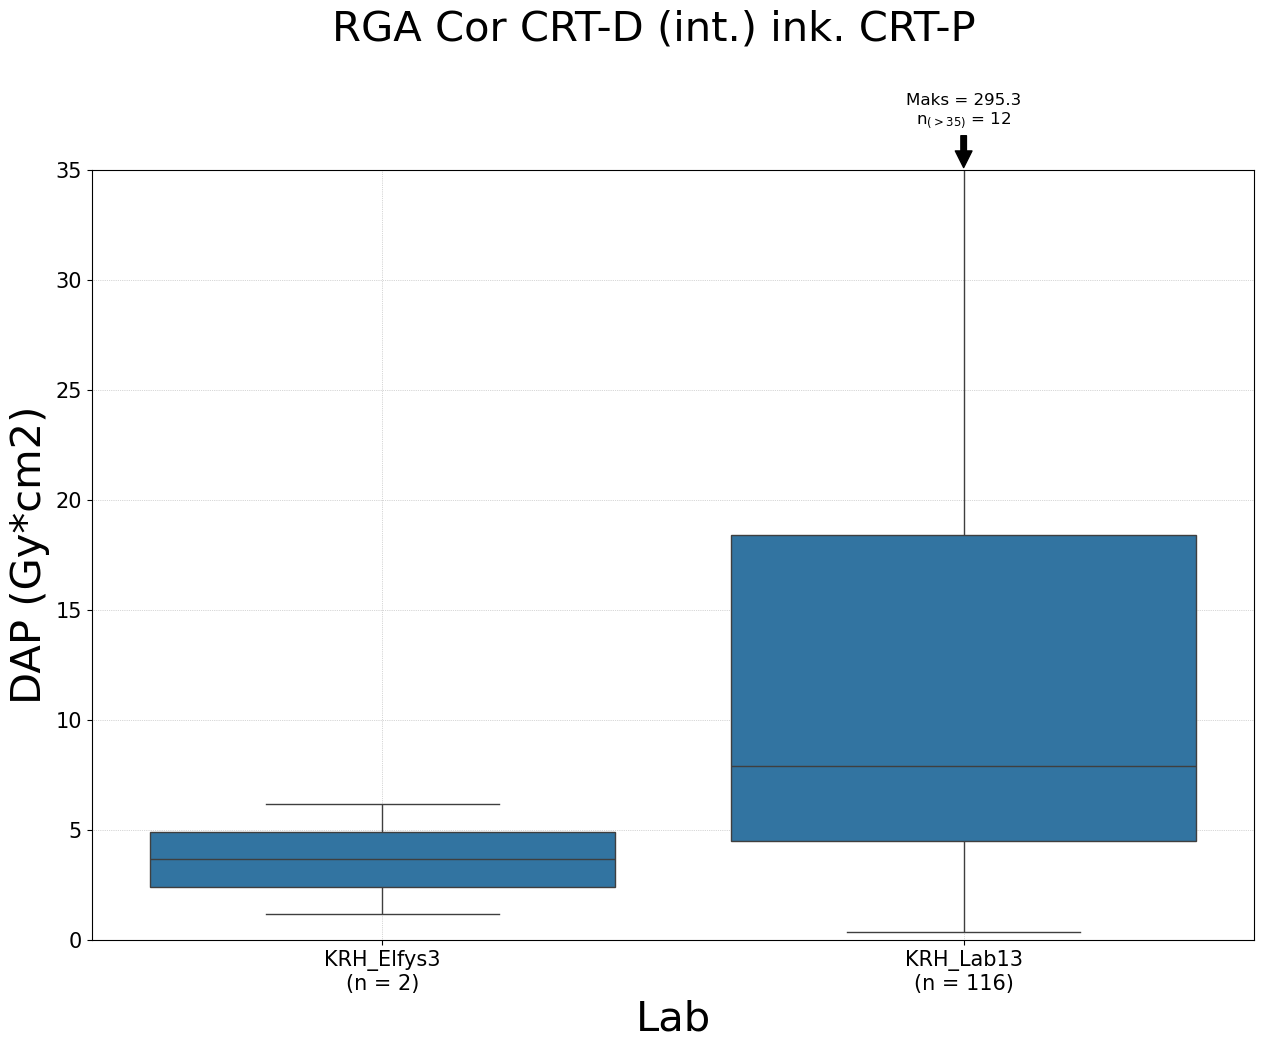

In [11]:
procedure = 'RGA Cor CRT-D (int.) ink. CRT-P'
bh_plot.plot_representative_dose(data, procedure, 35, export)

Reporting doses for RGA Cor Implantasjon PM/ICD (int.) ink. 2k og 1k PM:


Alle: n =  154, DAP: Median - 2.4, 95% CI: [2.0 - 2.96] IQR [1.6 - 6.0], Range (0.1 - 62.7).


KRH_Elfys3: n =    7, DAP: Median - 0.2 (Gy*cm2), 95% CI: [0.12 - 0.79] IQR [0.15 - 0.65], Range (0.08 - 2.47).
KRH_Lab13: n =  147, DAP: Median - 2.56 (Gy*cm2), 95% CI: [2.07 - 3.3] IQR [1.59 - 6.36], Range (0.39 - 62.71).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


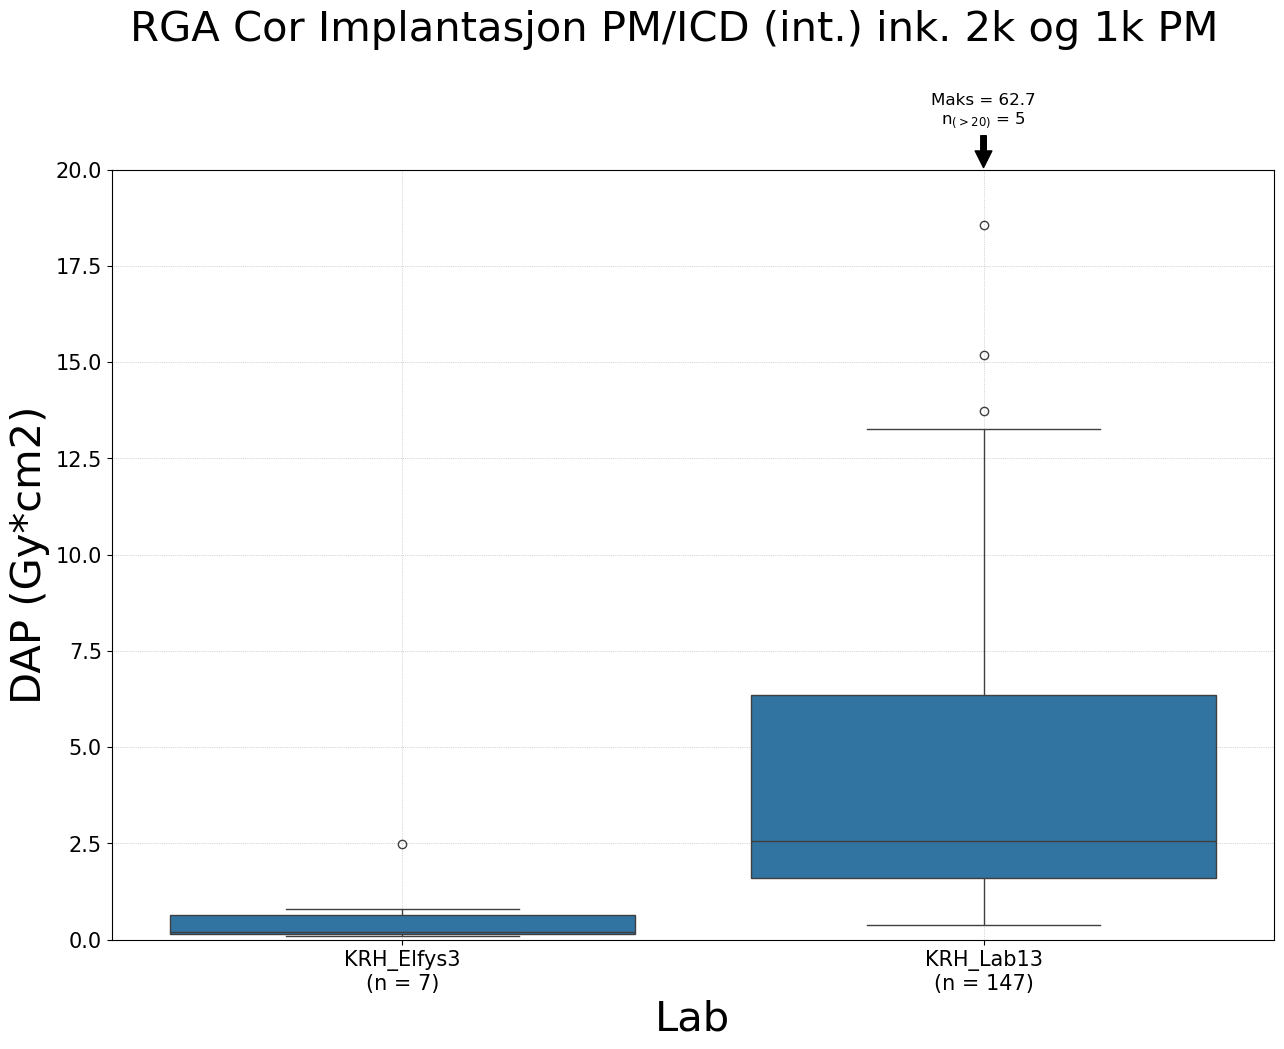

In [12]:
procedure = 'RGA Cor Implantasjon PM/ICD (int.) ink. 2k og 1k PM'
bh_plot.plot_representative_dose(data, procedure, 20, export)

In [ ]:
bh_report.print_summary(data)
bh_plot.plot_representative_dose_by_procedure(data[data!='Unmapped'])

Reporting doses for RGV Cor Biopsi:


Alle: n =  239, DAP: Median - 1.5, 95% CI: [1.29 - 1.84] IQR [0.9 - 2.9], Range (0.2 - 25.7).


KRH_LAB39: n =  239, DAP: Median - 1.54 (Gy*cm2), 95% CI: [1.29 - 1.84] IQR [0.88 - 2.91], Range (0.24 - 25.66).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


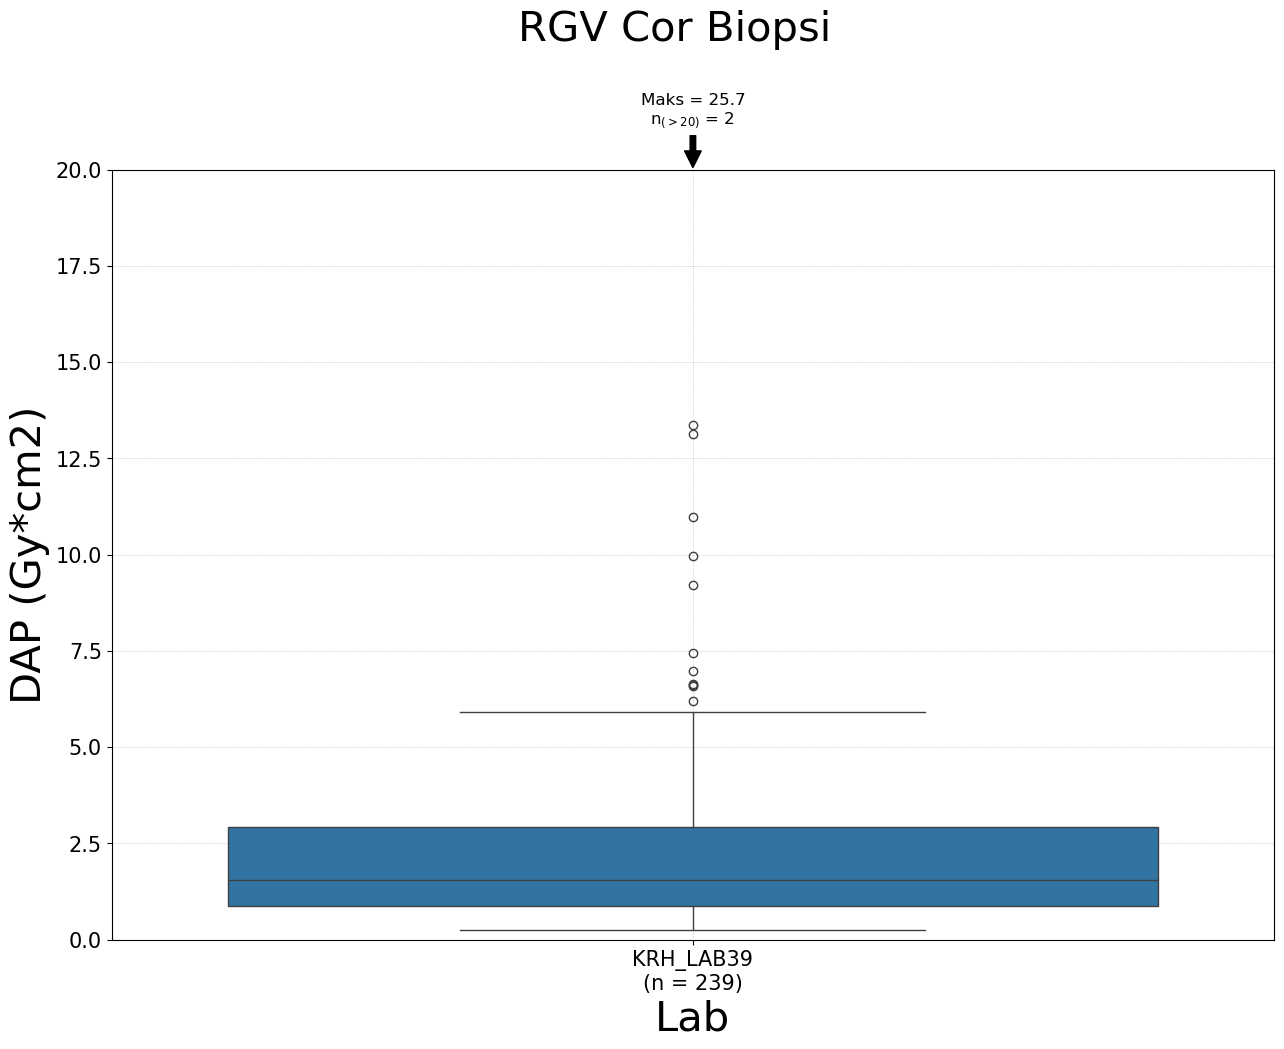

In [13]:
procedure = 'RGV Cor Biopsi'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)

Reporting doses for RGV Cor Hø kat, måling av trykk og flow i lille kretsløp:


Alle: n =  189, DAP: Median - 1.5, 95% CI: [1.06 - 1.79] IQR [0.6 - 3.7], Range (0.1 - 64.8).


KRH_LAB39: n =  189, DAP: Median - 1.49 (Gy*cm2), 95% CI: [1.09 - 1.79] IQR [0.6 - 3.71], Range (0.12 - 64.81).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


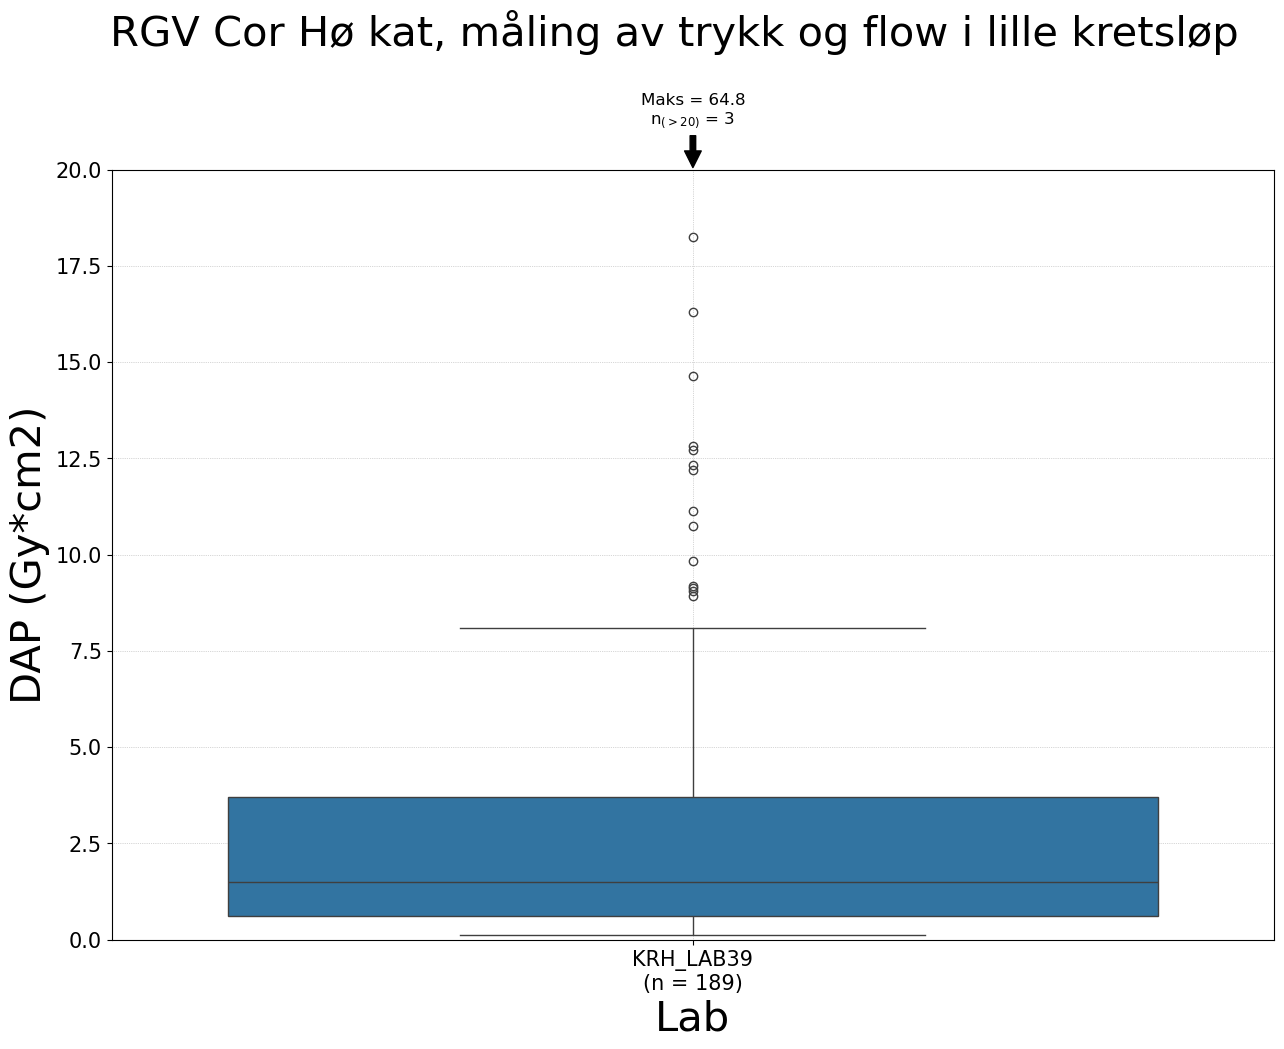

In [14]:
procedure = 'RGV Cor Hø kat, måling av trykk og flow i lille kretsløp'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)

Reporting doses for RGV Cor Høyre kat. Arytmi:


Alle: n =  282, DAP: Median - 1.5, 95% CI: [1.24 - 1.82] IQR [0.6 - 3.3], Range (0.0 - 41.0).


KRH_LAB39: n =  281, DAP: Median - 1.48 (Gy*cm2), 95% CI: [1.23 - 1.81] IQR [0.58 - 3.3], Range (0.0 - 40.97).
KRH_Lab13: n =    1, DAP: Median - 6.64 (Gy*cm2), 95% CI: [6.64 - 6.64] IQR [6.64 - 6.64], Range (6.64 - 6.64).
--------------------------------------------------




c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\plot_module.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels)


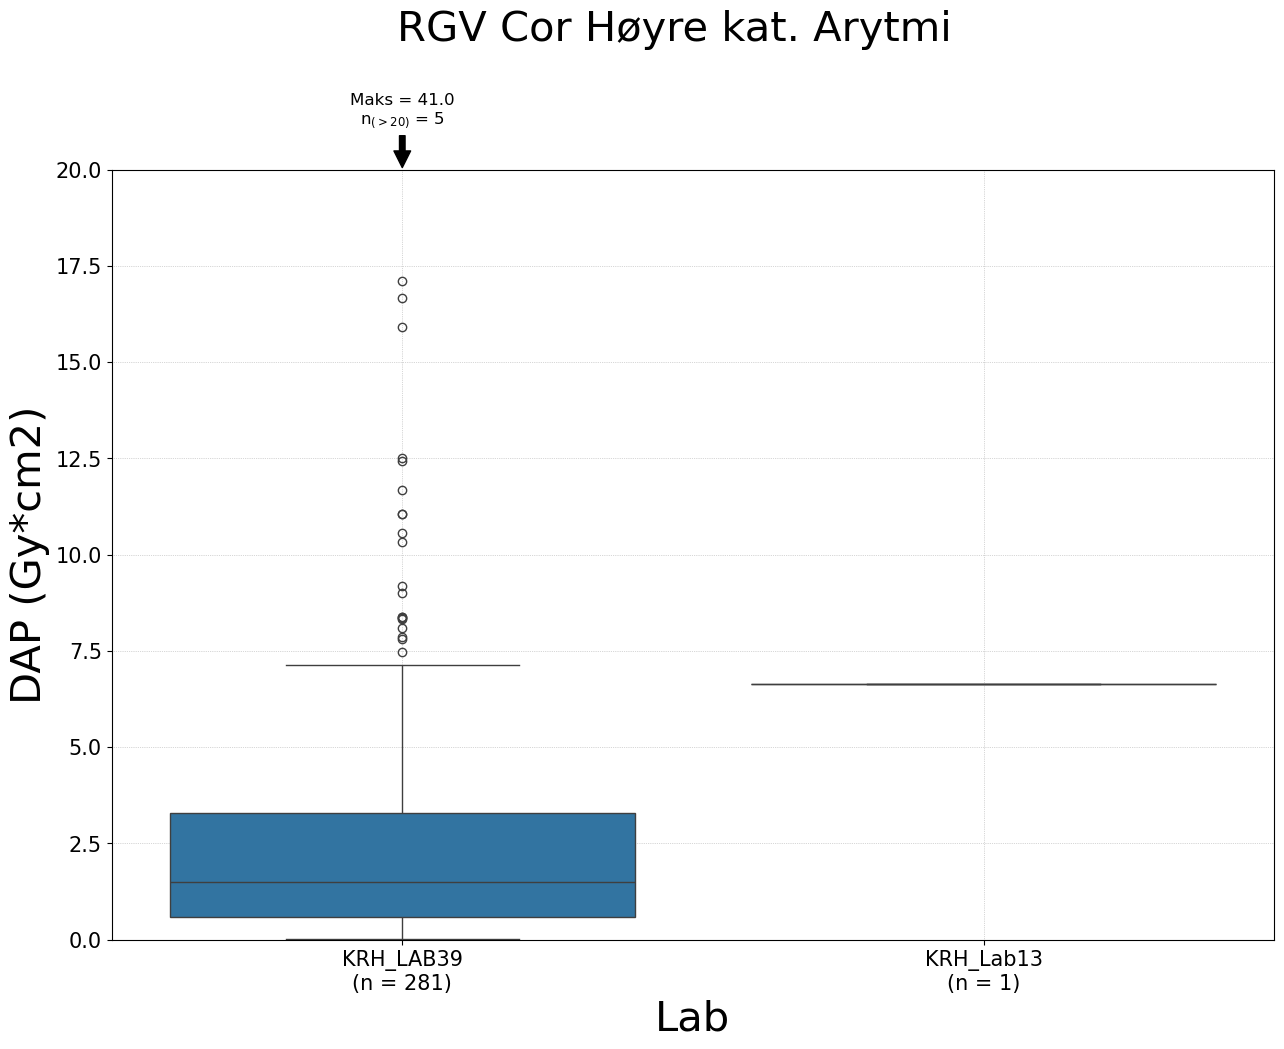

In [15]:
procedure = 'RGV Cor Høyre kat. Arytmi'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)